In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../data/cleaned_accidents.csv')
df.head()


,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details,Hour
0,Jammu and Kashmir,Unknown,2021,May,Monday,1:46,Serious,5,Cycle,0,...,Wet,Dark,Signs,61,66,Male,NaN,Yes,Curve,1.0
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,5,...,Dry,Dusk,Signs,92,60,Male,NaN,Yes,Straight Road,21.0
2,Chhattisgarh,Unknown,2023,May,Wednesday,5:37,Minor,5,Pedestrian,6,...,Under Construction,Dawn,Signs,120,26,Female,NaN,No,Bridge,5.0
3,Uttar Pradesh,Lucknow,2020,June,Saturday,0:31,Minor,3,Bus,10,...,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road,0.0
4,Sikkim,Unknown,2021,August,Thursday,11:21,Minor,5,Cycle,7,...,Wet,Dusk,Signs,115,30,Male,NaN,No,Intersection,11.0


In [4]:
print(df.shape)
df.isnull().sum().sort_values(ascending=False).head(10)


(3000, 23)


Driver License Status       975
Traffic Control Presence    716
Hour                        494
Month                         0
State Name                    0
City Name                     0
Year                          0
Accident Severity             0
Time of Day                   0
Day of Week                   0
dtype: int64

In [5]:
state_counts = df['State Name'].value_counts().head(10)
state_counts


State Name
Goa                  109
Sikkim               108
Delhi                108
Uttarakhand          106
Jammu and Kashmir    105
Kerala               102
Tamil Nadu           101
Nagaland             101
Gujarat              100
Puducherry            98
Name: count, dtype: int64

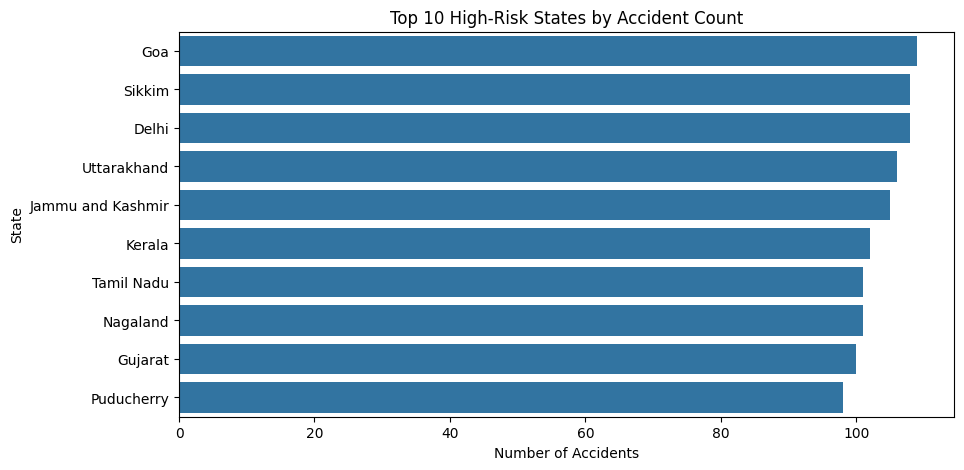

In [6]:
plt.figure(figsize=(10,5))
sns.barplot(x=state_counts.values, y=state_counts.index)
plt.title('Top 10 High-Risk States by Accident Count')
plt.xlabel('Number of Accidents')
plt.ylabel('State')
plt.show()


In [7]:
severity_counts = df['Accident Severity'].value_counts()
severity_counts


Accident Severity
Minor      1034
Fatal       985
Serious     981
Name: count, dtype: int64

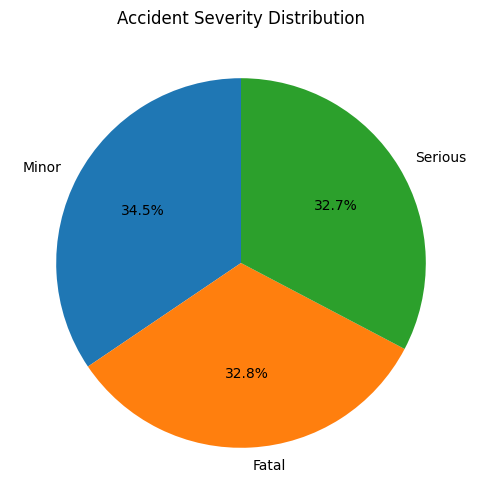

In [8]:
plt.figure(figsize=(6,6))
severity_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Accident Severity Distribution')
plt.ylabel('')
plt.show()


In [9]:
time_counts = df['Time of Day'].value_counts()
time_counts


Time of Day
18:24    7
3:40     7
14:16    7
8:34     7
12:6     6
        ..
7:3      1
14:31    1
6:2      1
23:13    1
11:14    1
Name: count, Length: 1263, dtype: int64

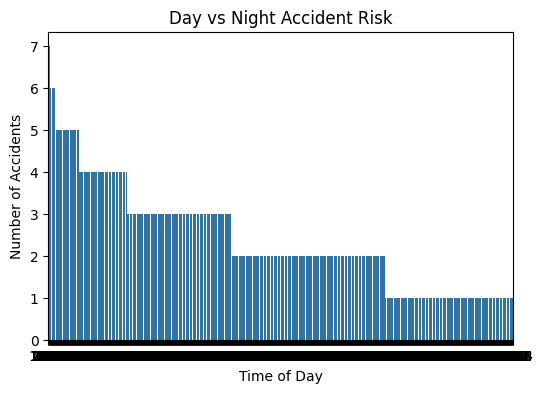

In [10]:
plt.figure(figsize=(6,4))
sns.barplot(x=time_counts.index, y=time_counts.values)
plt.title('Day vs Night Accident Risk')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.show()


In [15]:
# Fix time format by zero-padding minutes
df['Time_Fixed'] = df['Time of Day'].astype(str).str.strip()

df['Time_Fixed'] = df['Time_Fixed'].apply(
    lambda x: x.split(':')[0].zfill(2) + ':' + x.split(':')[1].zfill(2)
    if ':' in x else x
)

df['Hour'] = pd.to_datetime(df['Time_Fixed'], format='%H:%M', errors='coerce').dt.hour

df[['Time of Day', 'Time_Fixed', 'Hour']].head(10)


,Time of Day,Time_Fixed,Hour
0,1:46,01:46,1
1,21:30,21:30,21
2,5:37,05:37,5
3,0:31,00:31,0
4,11:21,11:21,11
5,8:4,08:04,8
6,18:55,18:55,18
7,11:40,11:40,11
8,8:26,08:26,8
9,2:1,02:01,2


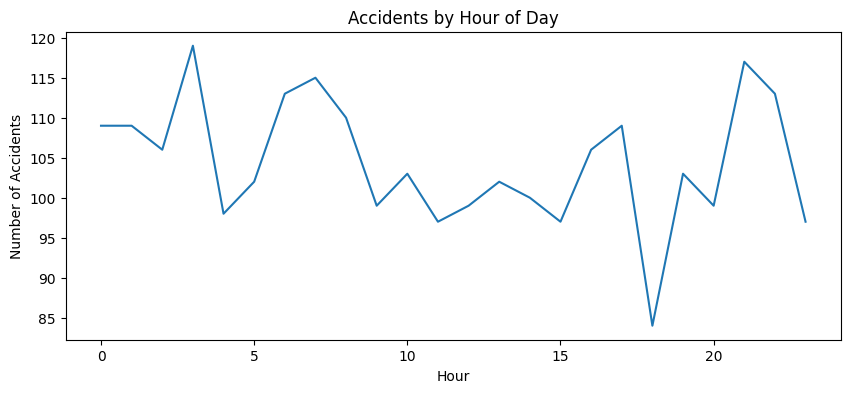

In [12]:
plt.figure(figsize=(10,4))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values)
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()


In [16]:
df['Is_Night'] = ((df['Hour'] >= 20) | (df['Hour'] <= 6)).astype(int)

df[['Time of Day', 'Hour', 'Is_Night']].head(10)


,Time of Day,Hour,Is_Night
0,1:46,1,1
1,21:30,21,1
2,5:37,5,1
3,0:31,0,1
4,11:21,11,0
5,8:4,8,0
6,18:55,18,0
7,11:40,11,0
8,8:26,8,0
9,2:1,2,1


In [17]:
severity_map = {
    'Minor': 0,
    'Serious': 1,
    'Fatal': 2
}

df['Severity_Encoded'] = df['Accident Severity'].map(severity_map)

df[['Accident Severity', 'Severity_Encoded']].head()


,Accident Severity,Severity_Encoded
0,Serious,1
1,Minor,0
2,Minor,0
3,Minor,0
4,Minor,0


In [18]:
gender_severity = df.groupby('Driver Gender')['Severity_Encoded'].mean()
gender_severity


Driver Gender
Female    0.986564
Male      0.980515
Name: Severity_Encoded, dtype: float64

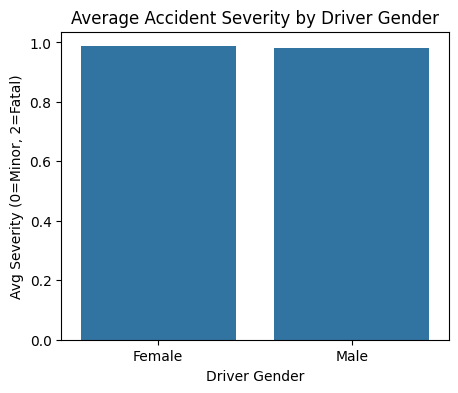

In [19]:
plt.figure(figsize=(5,4))
sns.barplot(x=gender_severity.index, y=gender_severity.values)
plt.title('Average Accident Severity by Driver Gender')
plt.ylabel('Avg Severity (0=Minor, 2=Fatal)')
plt.show()


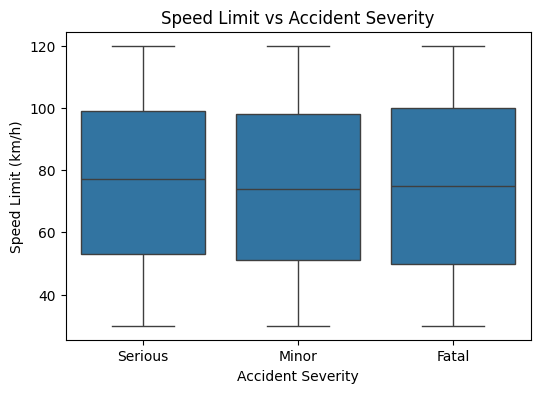

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Accident Severity', y='Speed Limit (km/h)', data=df)
plt.title('Speed Limit vs Accident Severity')
plt.show()


In [21]:
df.to_csv('../data/final_accidents_ml.csv', index=False)
